In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy


In [62]:
df = pd.read_csv('train.csv')

print(df)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UT

In [63]:
print("Shape of DataFrame:", df.shape)

print("Missing values:\n", df.isnull().sum())

print("Duplicate values:", df.duplicated().sum())


Shape of DataFrame: (7613, 5)
Missing values:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Duplicate values: 0


In [64]:
selected_columns = ['text', 'target']
df_selected = df[selected_columns]


In [65]:
print(df.describe())


                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


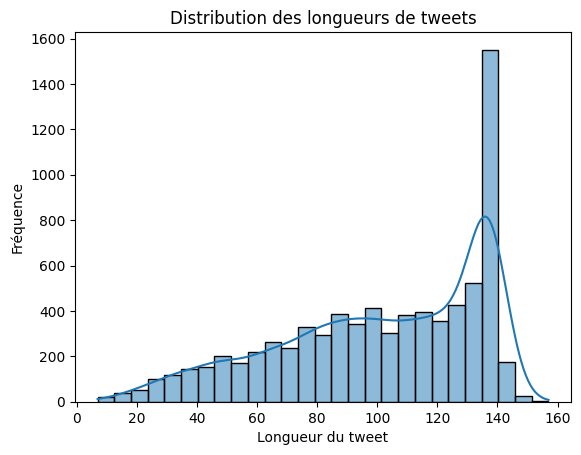

In [66]:
df['length'] = df['text'].apply(lambda x: len(x))

sns.histplot(df['length'], kde=True)
plt.title('Distribution des longueurs de tweets')
plt.xlabel('Longueur du tweet')
plt.ylabel('Fréquence')
plt.show()

In [67]:
ratio_catastrophe_tweets = df['target'].mean()
print("Ratio of disaster tweets:", ratio_catastrophe_tweets)

Ratio of disaster tweets: 0.4296597924602653


In [68]:
countTarget = (df['target'] == 1).sum()
countNotTarget = (df['target'] == 0).sum()

print("Nombre de tweets de catastrophe:", countTarget)
print("nombre de tweets non catastrophe:", countNotTarget)

Nombre de tweets de catastrophe: 3271
nombre de tweets non catastrophe: 4342


In [69]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(df['text'][0])

lemmas = [token.lemma_ for token in doc]
print(lemmas)

['our', 'deed', 'be', 'the', 'Reason', 'of', 'this', '#', 'earthquake', 'may', 'ALLAH', 'forgive', 'we', 'all']


In [70]:
from nltk.stem.porter import *
p_stemmer = PorterStemmer()

stemmed_tokens = [p_stemmer.stem(token) for token in lemmas]
print(stemmed_tokens)

['our', 'deed', 'be', 'the', 'reason', 'of', 'thi', '#', 'earthquak', 'may', 'allah', 'forgiv', 'we', 'all']


In [73]:
for token in nlp(doc):
    if not token.is_stop:
        print(token)

Deeds
Reason
#
earthquake
ALLAH
Forgive
